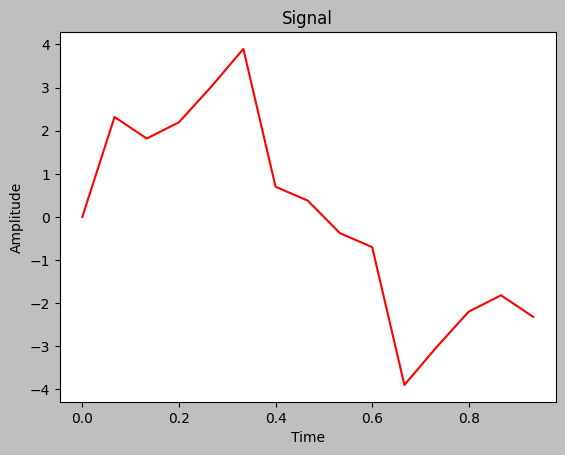

In [4]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.style.use('grayscale')

sampling_rate = 15
sampling_interval = 1 / sampling_rate

t_start = 0
t_end = 1

t = np.arange(t_start, t_end, sampling_interval)

x = np.zeros(t.size)

frequency_components = [1, 4, 7]
frequency_amplitudes = [3, 1, 0.5]

for [frequency, amplitude] in zip(frequency_components, frequency_amplitudes):
    x += amplitude * np.sin(2 * np.pi * frequency * t)

plt.plot(t, x, 'r')
plt.title('Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.show()

<class 'float'>


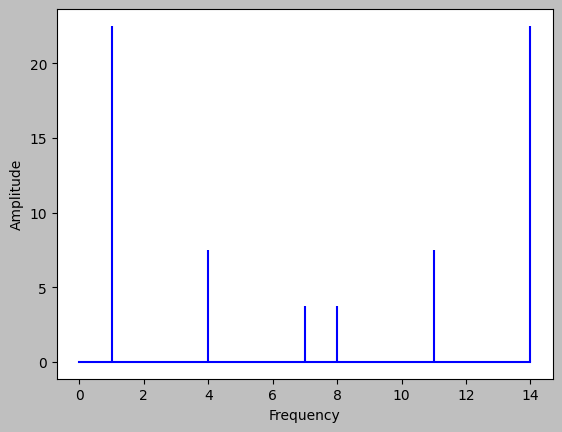

In [5]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sampling_rate
print(type(T))
freq = n/T

plt.stem(freq, abs(X), '-b', markerfmt = " ", basefmt = "-b")
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

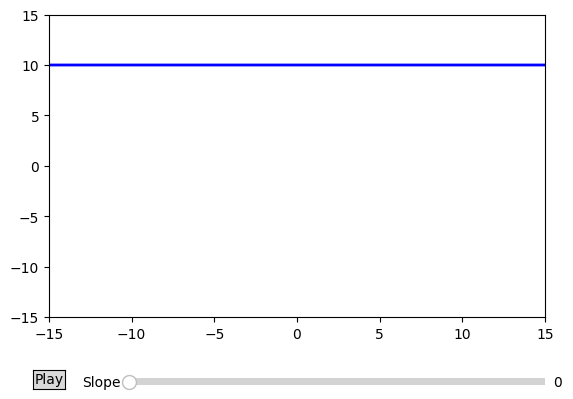

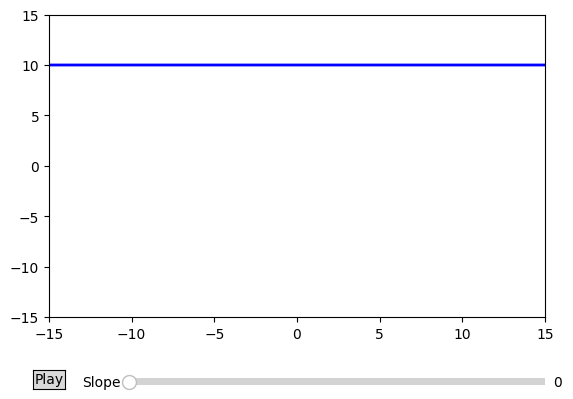

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from matplotlib.animation import FuncAnimation
%matplotlib inline

t_start = -100
t_end = 100
t_spacing = 10000

t = np.arange(t_start, t_end, 1/t_spacing)

slope = 0
intercept = 10
y = slope * t + intercept

t_limits = [-15, 15]
y_limits = [-15, 15]

fig, ax = plt.subplots()
plt.subplots_adjust(bottom = 0.25)

line, = ax.plot(t, y, '-b', lw = 2)

ax.set_xlim(t_limits)
ax.set_ylim(y_limits)

[slider_min, slider_max] = [0.0, 5.0]

def update(slope):
    y = slope * t + intercept
    line.set_ydata(y)
    fig.canvas.draw_idle()

def play(event):
    def animate(i):
        slope = slider_min + i * (slider_max - slider_min) / 100
        slider.set_val(slope)
        y = slope * t + intercept

        line.set_ydata(y)
        fig.canvas.draw_idle()
    global ani
    ani = FuncAnimation(fig, animate, frames = 100, interval = 50, repeat = False)

ax_slider = plt.axes([0.25, 0.1, 0.65, 0.03])
slider = Slider(ax_slider, 'Slope', slider_min, slider_max, valinit = slider_min)

ax_button = plt.axes([0.1, 0.1, 0.05, 0.04])
button = Button(ax_button, 'Play')

slider.on_changed(update)

button.on_clicked(play)

plt.show()

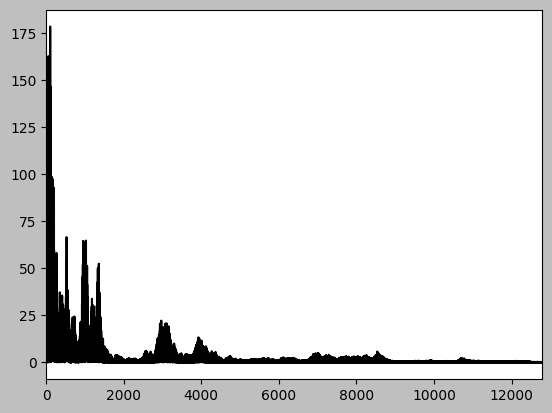

In [22]:
import os
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

directory_path = os.path.dirname(os.path.abspath(' '))

file_list = os.listdir(directory_path)

excel_file_list = [file for file in file_list if file.endswith('.csv')]

excel_file_keys = []

for excel_file in excel_file_list:
    first_index = excel_file.find('_')
    second_index = excel_file.find('_', first_index + 1)

    excel_file_keys.append(excel_file[first_index + 1 : second_index])
# print(excel_file_keys)

excel_file_data = []

for excel_file in excel_file_list:
    file_path = os.path.join(directory_path, excel_file)
    # print(file_path)
    data_values = pd.read_csv(file_path)
    excel_file_data.append(data_values.iloc[:,1].values)

min_samples = len(excel_file_data[0])
for file in excel_file_data:
    min_samples = min(len(file), min_samples)

excel_file_data = [file[:min_samples] for file in excel_file_data]


leak_samples = dict(zip(excel_file_keys, excel_file_data))

file_path = os.path.join(directory_path, excel_file_list[0])
data = pd.read_csv(file_path)
time_samples = data.iloc[:,0].values
time_samples = time_samples[:min_samples]

# pprint.pprint(leak_samples)

fft_analysed_samples = dict()
for key, value in leak_samples.items():
    fft_analysed_samples[key] = fft(value)

N = len(fft_analysed_samples[excel_file_keys[0]])
n = np.arange(N)

T = N * time_samples[1]

freq = n / T
freq_max_limit = np.median(freq)
plt.plot(freq, abs(fft_analysed_samples[excel_file_keys[0]]))
plt.xlim([0, freq_max_limit])
plt.show()